# Importando as bibliotecas de trabalho

In [37]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ttest_ind, ztest
from scipy.stats import norm
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [76]:
    # Dataset
    dataset = 'pnad_2015.csv'
    
    # Imporatndo o Dataset
    df = pd.read_csv(dataset)
    df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Análise exploratória e descritiva

Gráfico com a quatidade de homens e mulheres


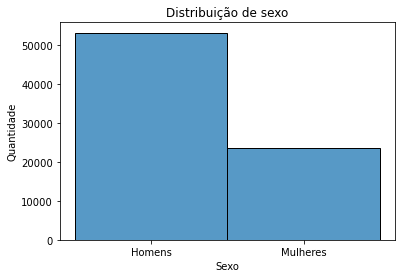

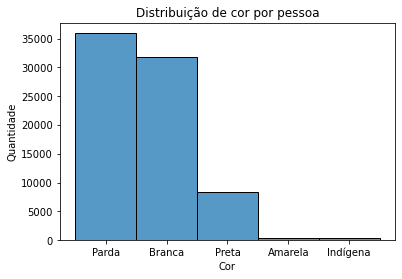

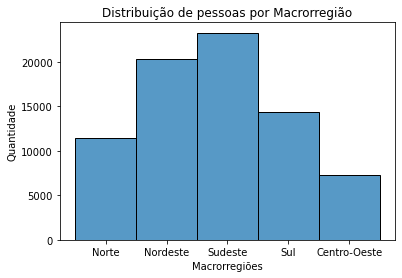

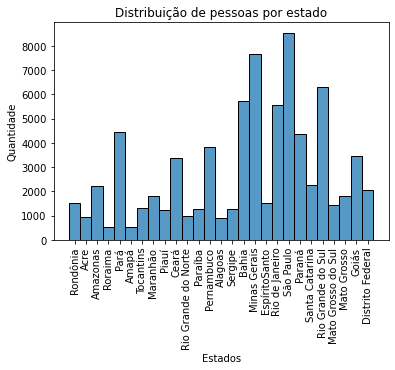

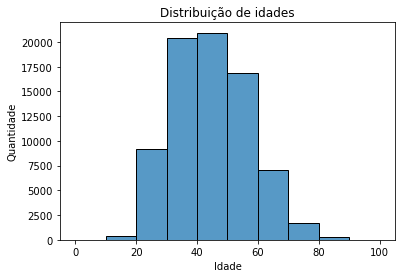

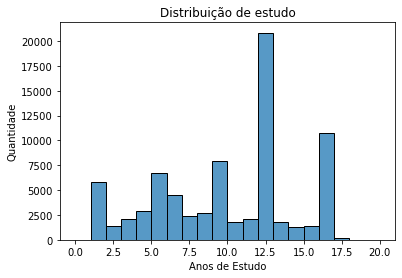

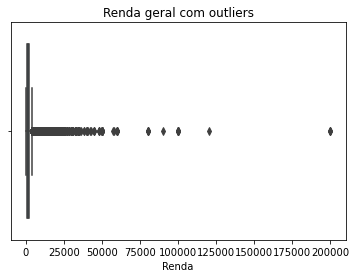

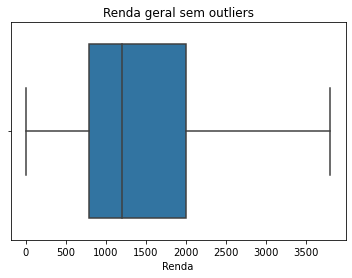

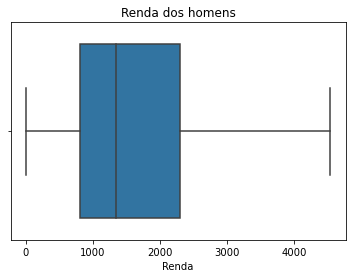

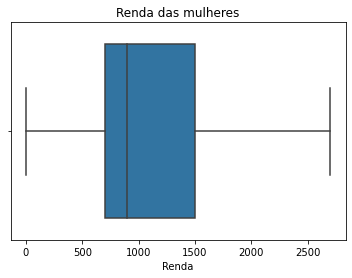

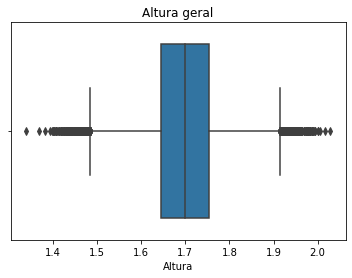

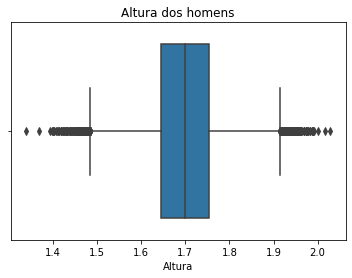

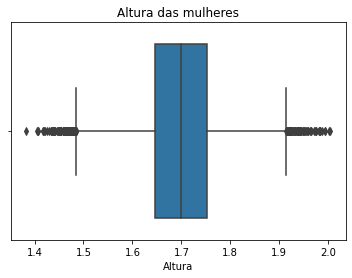

In [103]:
# Gráfico com a quatidade de homens e mulheres
print('Gráfico com a quatidade de homens e mulheres')
graph_sex = sns.histplot(df['Sexo'].map({0:'Homens', 1:'Mulheres'})).set(title = 'Distribuição de sexo', ylabel = 'Quantidade')
plt.show()

graph_cor = sns.histplot(df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'})).set(title = 'Distribuição de cor por pessoa', ylabel = 'Quantidade')
plt.show()

graph_macro_reg = sns.histplot(df['UF'].map({11:'Norte', 12: 'Norte', 13:'Norte', 14:'Norte', 15:'Norte', 16:'Norte', 17:'Norte', 21: 'Nordeste', 22: 'Nordeste', 23: 'Nordeste', 24: 'Nordeste', 25: 'Nordeste', 26: 'Nordeste', 27: 'Nordeste', 28:'Nordeste', 29:'Nordeste', 31:'Sudeste', 32:'Sudeste', 33:'Sudeste', 35:'Sudeste', 41:'Sul', 42:'Sul',43:'Sul', 50:'Sul', 51:'Centro-Oeste', 52:'Centro-Oeste', 53:'Centro-Oeste'})).set(title = 'Distribuição de pessoas por Macrorregião', ylabel = 'Quantidade', xlabel = 'Macrorregiões')
plt.show()

graph_estados = sns.histplot(df['UF'].map({11:'Rondônia', 12: 'Acre', 13:'Amazonas', 14:'Roraima', 15:'Pará', 16:'Amapá', 17:'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'EspíritoSanto', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina',43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás', 53:'Distrito Federal'})).set(title = 'Distribuição de pessoas por estado', ylabel = 'Quantidade', xlabel = 'Estados')
plt.xticks(rotation=90)
plt.show()

graph_idades = sns.histplot(df['Idade'], bins = [0,10,20,30,40,50,60,70,80,90,100]).set(title = 'Distribuição de idades', ylabel = 'Quantidade')
plt.show()

graph_anos_de_estudo = sns.histplot(df['Anos de Estudo'], bins = [y for y in range(21)]).set(title = 'Distribuição de estudo', ylabel = 'Quantidade')
plt.show()

sns.boxplot(x = df['Renda']).set(title = 'Renda geral com outliers')
plt.show()

sns.boxplot(x = df['Renda'], showfliers = False).set(title = 'Renda geral sem outliers')
plt.show()

sns.boxplot(x = df.query('Sexo == 0')['Renda'], showfliers = False).set(title = 'Renda dos homens')
plt.show()

sns.boxplot(x = df.query('Sexo == 1')['Renda'], showfliers = False).set(title = 'Renda das mulheres')
plt.show()

sns.boxplot(x = df['Altura']).set(title = 'Altura geral')
plt.show()

sns.boxplot(x = df.query('Sexo == 0')['Altura']).set(title = 'Altura dos homens')
plt.show()

sns.boxplot(x = df.query('Sexo == 1')['Altura']).set(title = 'Altura das mulheres')
plt.show()

In [49]:
cores = (list(set(df['Cor'])))

df_adapt = df.copy()
tabela1 = pd.crosstab(df['Renda'] ,df_adapt['Cor'].map({0:'Indígena',2:'Branca',4:'Preta',6:'Amarela',8:'Parda'}))

freq_salario = pd.DataFrame()
freq_salario['Absoluta'] = pd.cut(df['Renda'], bins = [i*1000 for i in range(20)]).value_counts()

# por cor
freq_salario2 = pd.DataFrame()
freq_salario2 = pd.cut(df.query('Cor == 2')['Renda'], bins = [i*1000 for i in range(20)]).value_counts()

rendas = dict()
estudos = dict()

for cor in cores:
    estudo_medio = df[df.Cor == int(cor)]['Anos de Estudo'].mean()
    
    rendas[cor] = renda_media
    estudos[cor] = estudo_medio

print(estudos)
rendas

{0: 8.224089635854341, 2: 10.49030331604589, 4: 8.861518293409606, 6: 12.556818181818182, 8: 8.689965205288797}


{0: 1513.596102992345,
 2: 1513.596102992345,
 4: 1513.596102992345,
 6: 1513.596102992345,
 8: 1513.596102992345}

In [46]:
freq_salario2

(1000, 2000]      10926
(0, 1000]          9155
(2000, 3000]       4155
(3000, 4000]       1994
(4000, 5000]       1448
(5000, 6000]        661
(7000, 8000]        485
(9000, 10000]       485
(6000, 7000]        459
(14000, 15000]      220
(11000, 12000]      155
(8000, 9000]        150
(10000, 11000]       71
(15000, 16000]       62
(13000, 14000]       52
(12000, 13000]       48
(17000, 18000]       39
(16000, 17000]       28
(18000, 19000]       14
Name: Renda, dtype: int64

## Análise estatística

## Cálculo de parâmetros

In [39]:
n_M, n_H = 500, 500

significancia = 0.01
confianca = 1 - significancia

n = n_M + n_H

amostra_H = df[df.Sexo == 0]['Renda'].sample(n = n_H, random_state = 1)
amostra_M = df[df.Sexo == 1]['Renda'].sample(n = n_M, random_state = 1)

media_H = amostra_H.mean()
media_M = amostra_M.mean()

media_pop_H = df[df.Sexo == 0]['Renda'].mean()
media_pop_M = df[df.Sexo == 1]['Renda'].mean()

desvio_H = amostra_H.std()
desvio_M = amostra_M.std()

## Formulando algumas hipóteses para o problema


> Teste Bicaudal

> $H_0$: A Média salarial dos homens é igual a média salarial das mulheres

> $H_1$ As médias são diferentes

$\begin{cases}
H_0: \mu_M = \mu_H \\
H_1: \mu_M \neq \mu_H
\end{cases}
$

> Sendo $H_0$ a hipótese nula e $H_1$ a hipótese alternativa


## Realizando teste da hipótese nula

Testando as hipóteses

> Teste Bicaudal

> 1. Rejeita-se $H_0$ se $z \leq -z{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$ 
> 2. Rejeita-se $H_0$ se o valor de $p <\alpha$

In [11]:
# Z_alpha para bicaudal

probabilidade = confianca + significancia / 2

z_alpha = norm.ppf(probabilidade)

z_alpha2 = norm.ppf(1 - probabilidade)
z_alpha

2.5758293035489004

In [12]:
# Ztest
graus_de_liberdade = n = 500

# Two-sided -> Bicaudal
z, p = ztest(amostra_H, amostra_M, alternative = 'two-sided')
print (f'z = {z} e p = {p}')

t = t_student.ppf(probabilidade, graus_de_liberdade)
print (f't = {t}')

z = 3.323321032265407 e p = 0.0008895248005648503
t = 2.5856978351416706


### Testando 1 e 2

In [16]:
if z >= z_alpha or z <= z_alpha2: # Teste 1
    print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')
else:
    if p < significancia: # Teste 2
        print(f'A hipótese nula está correta com {confianca:.0%} de confiança.')
    else:
        print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')

A hipótese alternativa está correta com 99% de confiança.


Dessa maneira, nossa hipótese nula aparenta estar correta com uma confiança de 99%. Isso que dizer que as médias salariais muito provavelmente possuem médias diferentes. Dessa forma, resta analisar para que lado tende essa diferença e se possível tentar metrificá-la.

Para isso será preciso analisar de forma unicaudal o problema, sendo que temos duas distribuições unicaudais possíveis, uma com a média das mulheres sendo maiores e outra com a média dos homens sendo maiores. Como:

$\begin{cases}
\mu_H = 2059.212 \\
\mu_M = 1548.274
\end{cases}
$

Sendo assim, 

$
\mu_H >= \mu_M \\
$

Dessa maneira irei realizar o teste estatístico considerando as hipóteses a seguir:
$\begin{cases}
H_0: \mu_M =< \mu_H \\
H_1: \mu_H > \mu_M
\end{cases}
$

In [33]:
# Z_alpha para unicaudal
probabilidade = confianca

z_alpha = norm.ppf(probabilidade)

z_alpha2 = norm.ppf(1 - probabilidade)
z_alpha, z_alpha2

(2.3263478740408408, -2.3263478740408408)

In [37]:
# Ztest
graus_de_liberdade = n = 500

# Two-sided -> Unicaudal
z, p = ztest(amostra_H, amostra_M, alternative = 'smaller')
print (f'z = {z} e p = {p}')

t = t_student.ppf(probabilidade, graus_de_liberdade)
print (f't = {t}')

z = 3.323321032265407 e p = 0.9995552375997175
t = 2.333828955352198


### Testando 1 e 2

In [40]:
if z <= z_alpha: # Teste 1
    print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')
else:
    if p < significancia: # Teste 2
        print(f'A hipótese nula está correta com {confianca:.0%} de confiança.')
    else:
        print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')

A hipótese alternativa está correta com 99% de confiança.


Dessa maneira chegamos a conclusão de que com uma confiança de 99% podemos afirmar que a média salarial dos homens é maior do que a média salarial das mulheres. Ou seja, que a nossa Hipótese Nula era verdadeira.

In [42]:
media_H, media_M ,media_pop_H, media_pop_M

(2059.212, 1548.274, 2192.4415962441312, 1566.84739296312)